In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import imageio.v2 as imageio
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [2]:
os.listdir('colon-image-data/train/0_normal')

['train_normal_ (1).jpg',
 'train_normal_ (10).jpg',
 'train_normal_ (100).jpg',
 'train_normal_ (101).jpg',
 'train_normal_ (102).jpg',
 'train_normal_ (103).jpg',
 'train_normal_ (104).jpg',
 'train_normal_ (105).jpg',
 'train_normal_ (106).jpg',
 'train_normal_ (107).jpg',
 'train_normal_ (108).jpg',
 'train_normal_ (109).jpg',
 'train_normal_ (11).jpg',
 'train_normal_ (110).jpg',
 'train_normal_ (111).jpg',
 'train_normal_ (112).jpg',
 'train_normal_ (113).jpg',
 'train_normal_ (114).jpg',
 'train_normal_ (115).jpg',
 'train_normal_ (116).jpg',
 'train_normal_ (117).jpg',
 'train_normal_ (118).jpg',
 'train_normal_ (119).jpg',
 'train_normal_ (12).jpg',
 'train_normal_ (120).jpg',
 'train_normal_ (121).jpg',
 'train_normal_ (122).jpg',
 'train_normal_ (123).jpg',
 'train_normal_ (124).jpg',
 'train_normal_ (125).jpg',
 'train_normal_ (126).jpg',
 'train_normal_ (127).jpg',
 'train_normal_ (128).jpg',
 'train_normal_ (129).jpg',
 'train_normal_ (13).jpg',
 'train_normal_ (130).jpg'

In [12]:
im = imageio.imread('colon-image-data/train/0_normal/train_normal_ (1).jpg')

In [4]:
im.size

979695

In [5]:
# Set the path dataset directory
train_path = 'colon-image-data/train'
test_path = 'colon-image-data/test'
val_path = 'colon-image-data/val'
class_names = ['0_normal', 
                '1_ulcerative_colitis', 
                '2_polyps', 
                '3_esophagitis']

In [10]:
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   fill_mode='constant',
                                   brightness_range=[0.1, 1.0])
                                
val_datagen = ImageDataGenerator(rescale = 1. / 255)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

train_gen = train_datagen.flow_from_directory(
        train_path,
        class_mode='categorical',
        seed=42,
        classes=class_names)

val_gen = val_datagen.flow_from_directory(
        val_path,
        class_mode='categorical',
        seed=42,
        shuffle=False,
        classes=class_names)

test_gen = test_datagen.flow_from_directory(
        test_path,
        class_mode='categorical',
        seed=42,
        shuffle=False,
        classes=class_names)

#print samples per class
train_quant = len(train_gen.filenames)
val_quant = len(val_gen.filenames)
test_quant = len(test_gen.filenames)

print("Train samples:", train_quant)
print("Validation samples:", val_quant)
print("Test samples:", test_quant)

#check the class indices
train_gen.class_indices
val_gen.class_indices
test_gen.class_indices

Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.
Train samples: 3200
Validation samples: 2000
Test samples: 800


{'0_normal': 0, '1_ulcerative_colitis': 1, '2_polyps': 2, '3_esophagitis': 3}

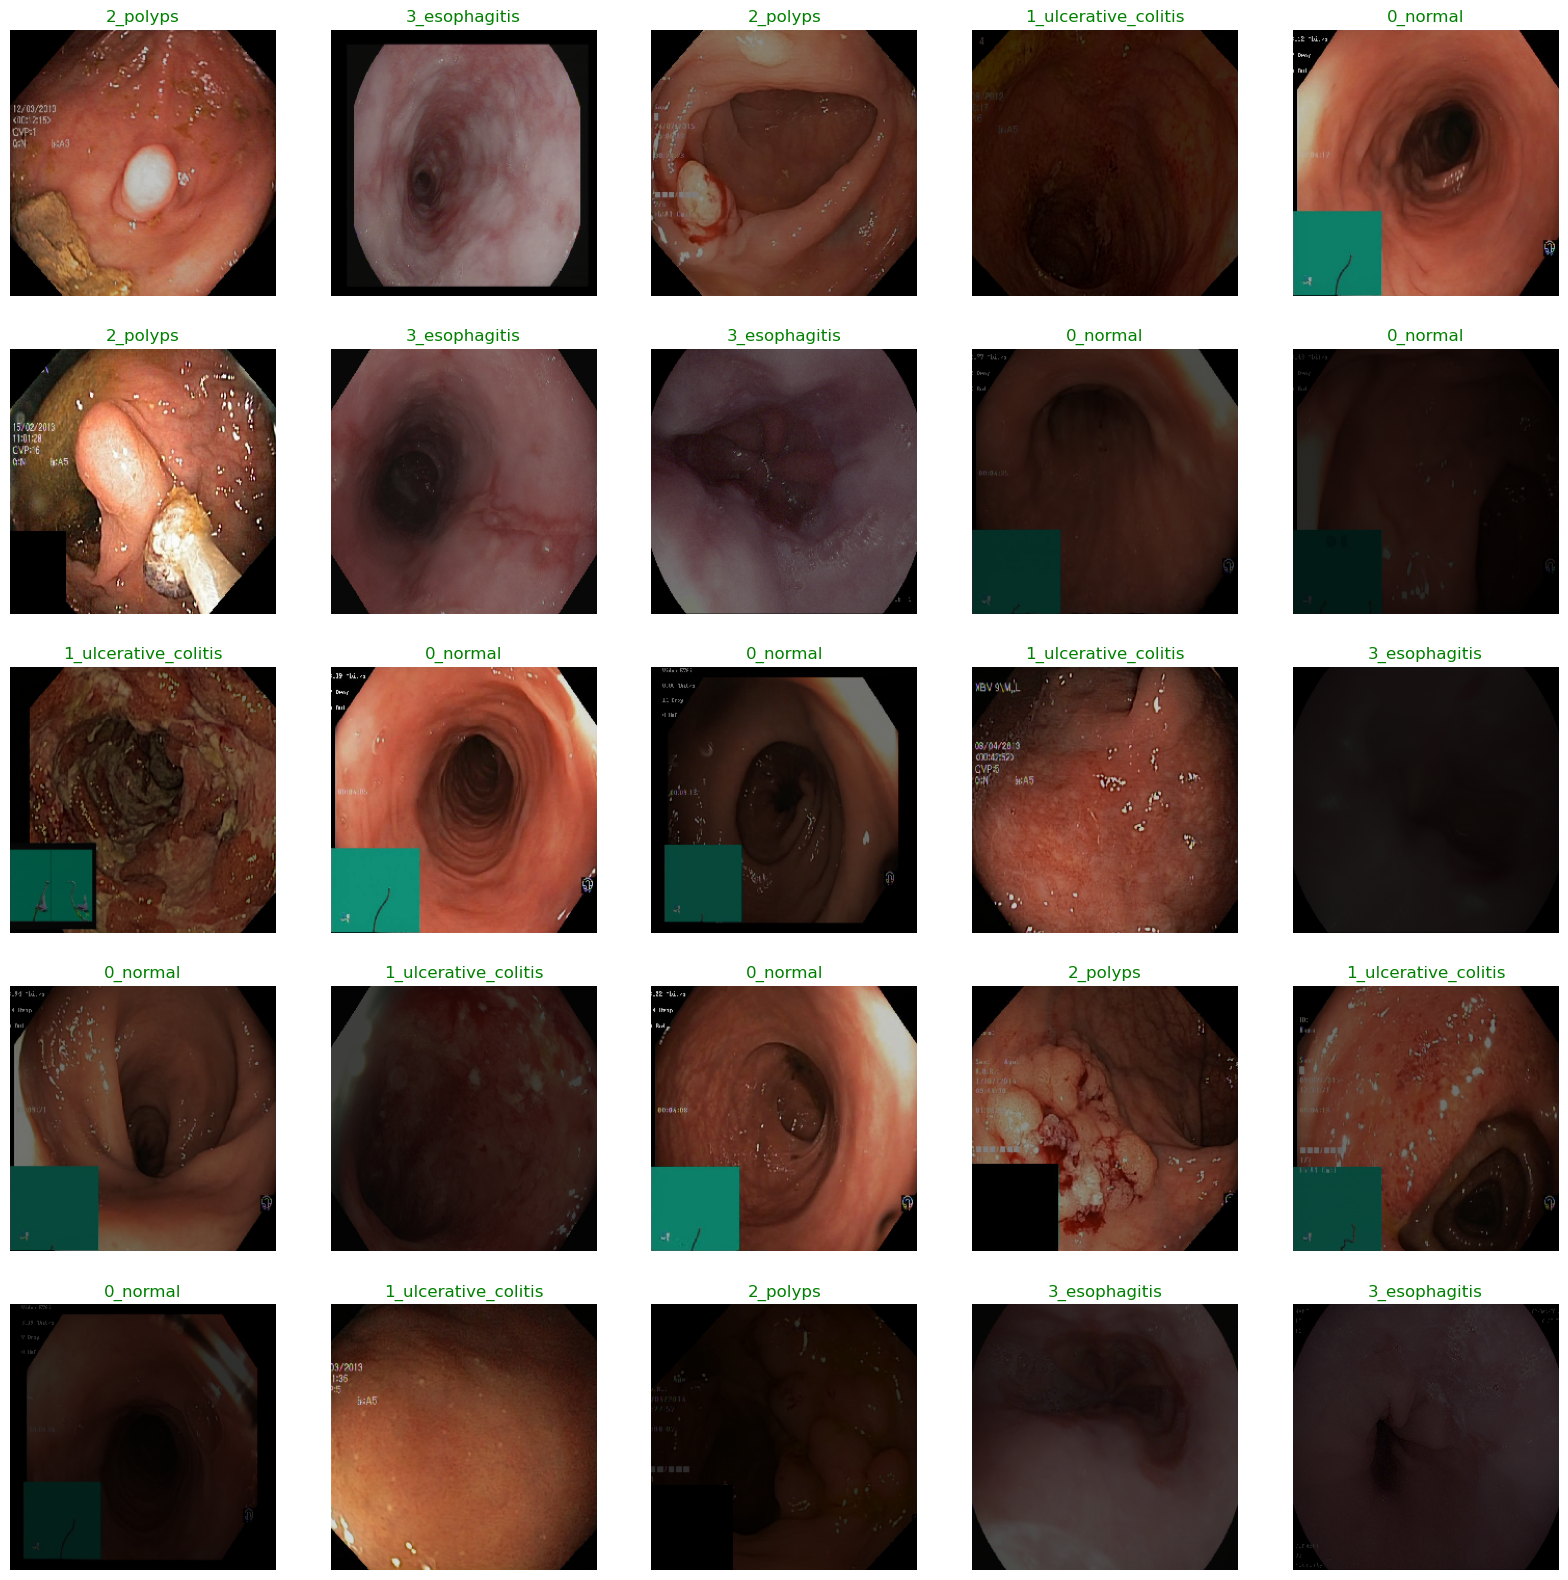

In [13]:
def image_samples(gen ):
    x_dict=gen.class_indices
    classes=list(x_dict.keys())    
    images,labels=next(gen) # get a sample batch from the generator 
    plt.figure(figsize=(20, 20))
    length=len(labels)
    if length<25:   #show maximum of 25 images
        r=length
    else:
        r=25
    for i in range(r):        
        plt.subplot(5, 5, i + 1)
        image=images[i]       
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color='Green', fontsize=12)
        plt.axis('off')
    plt.show()
    
image_samples(train_gen)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()


In [ ]:
num_classes = 2
batch_size = 32
model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=10,
    validation_data=val_gen,
    validation_steps=val_gen.samples // batch_size)


In [ ]:

# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_gen)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")